# **Project Name - Fraud Detection**:

**Project type** - Supervised Classification

**Contribution** - Individual



# **Project Summary**


This project aims to build a machine learning model to predict the fraud detection.

**Summary**

**Problem:** Classifying credit card transactions as fraudulent or non-fraudulent.

**Data:** Anonymized dataset with credit card transaction data.

**EDA Insights :**
The dataset is highly imbalanced, with far fewer fraud cases than non-fraud cases.

Correlation analysis showed no strong linear relationship between features and the target.

# **GitHub Link**



# **Problem Statment**

Objective: The goal is to build a supervised classification model to detect fraudulent transactions based on the provided credit card dataset. The key metrics to evaluate the model will be Precision, Recall, and F1-Score.

# **Let's Begin**

# **1. Know Your Data**

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/creditcard.csv'
data=pd.read_csv(file_path)

# Dataset First View

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Row and Column Count

In [ ]:
# Shape gives the Total number of rows and columns
data.shape

(284807, 31)

# Dataset Information

In [ ]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Duplicate Values

In [ ]:
# Dataset Duplicate value count
data.duplicated().sum()

1081

In [ ]:
# Drop duplicates
data.drop_duplicates(inplace=True)

Missing Values/Null Values

In [ ]:
# Missing/Null Values count
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: >

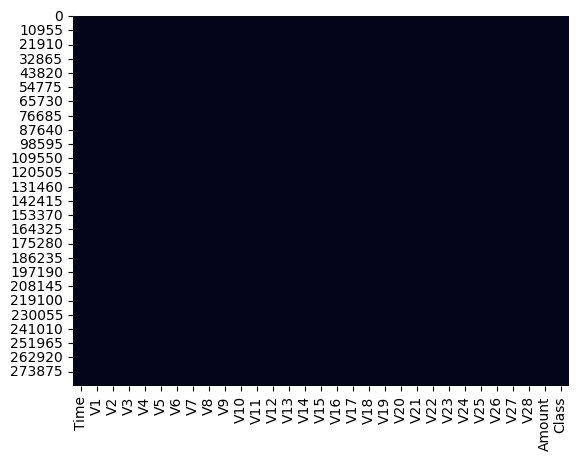

In [ ]:
# Visualizing missing values
sns.heatmap(data.isnull(),cbar=False)

# What did I know about Dataset?



*   My dataset have 284807 rows and 31 columns.my dataset does not contains any categorical column.
*   It has 0 null values and 1081 duplicate values.



# **2. Understanding Variables**

In [ ]:
# Dataset columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Using Describe method which gives a quick statical summary of dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Check Unique Values fro each variable

In [ ]:
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  Time is 124592 .
No. of unique values in  V1 is 275663 .
No. of unique values in  V2 is 275663 .
No. of unique values in  V3 is 275663 .
No. of unique values in  V4 is 275663 .
No. of unique values in  V5 is 275663 .
No. of unique values in  V6 is 275663 .
No. of unique values in  V7 is 275663 .
No. of unique values in  V8 is 275663 .
No. of unique values in  V9 is 275663 .
No. of unique values in  V10 is 275663 .
No. of unique values in  V11 is 275663 .
No. of unique values in  V12 is 275663 .
No. of unique values in  V13 is 275663 .
No. of unique values in  V14 is 275663 .
No. of unique values in  V15 is 275663 .
No. of unique values in  V16 is 275663 .
No. of unique values in  V17 is 275663 .
No. of unique values in  V18 is 275663 .
No. of unique values in  V19 is 275663 .
No. of unique values in  V20 is 275663 .
No. of unique values in  V21 is 275663 .
No. of unique values in  V22 is 275663 .
No. of unique values in  V23 is 275663 .
No. of unique values in 

# **4. Visualizing Data:**
Use visualizations to understand the data better (e.g., correlation heatmap, distribution plots).

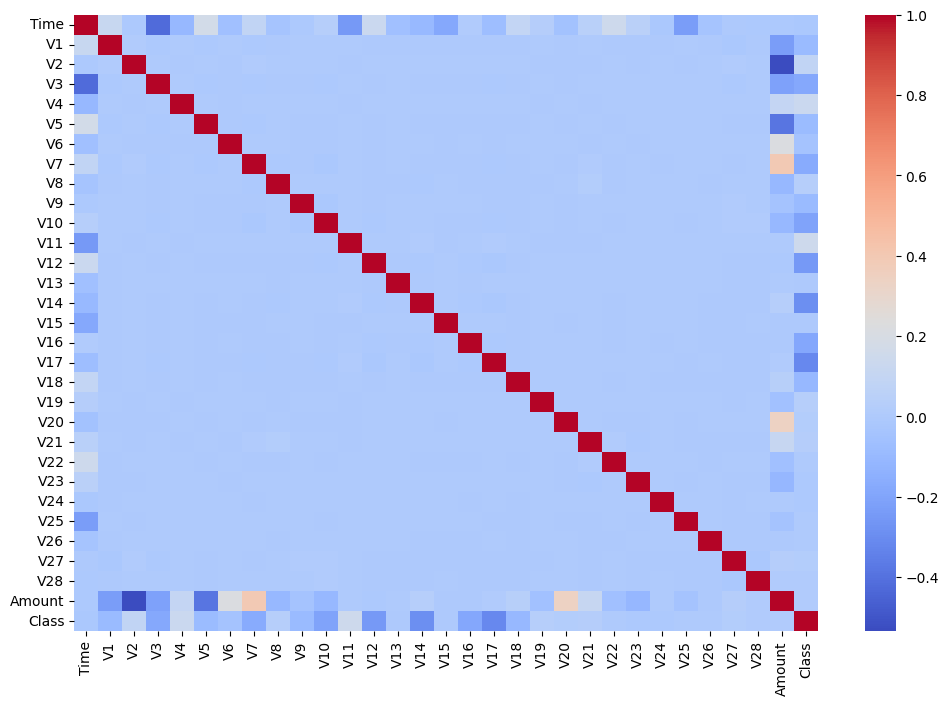

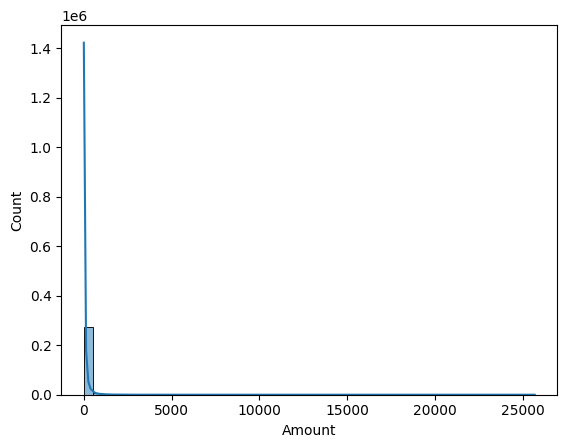

In [ ]:

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

# Distribution of the 'Amount' feature
sns.histplot(data['Amount'], bins=50, kde=True)
plt.show()


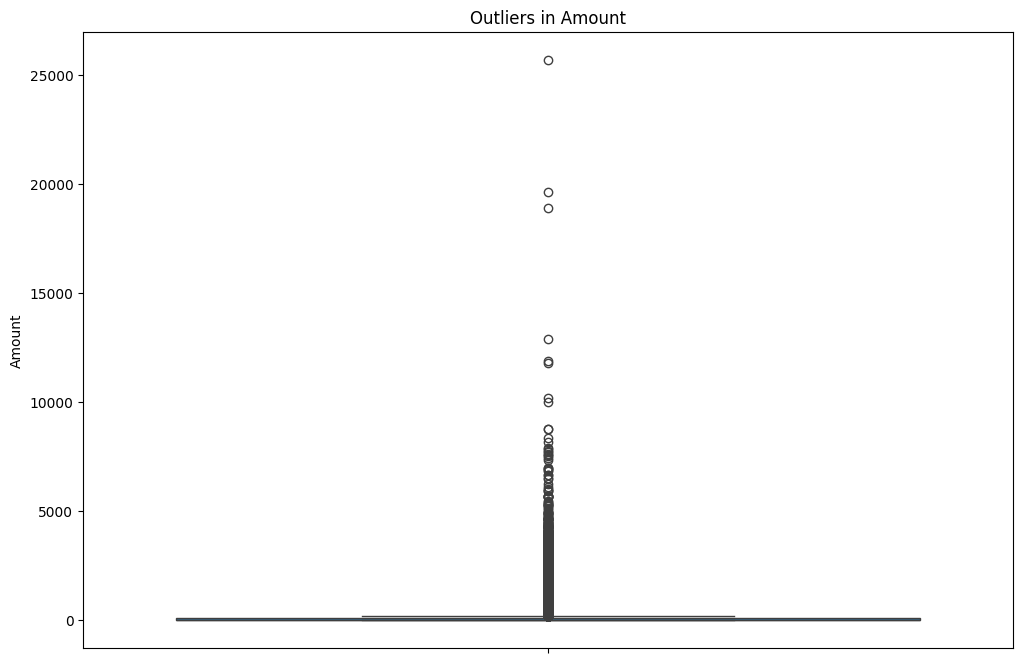

In [ ]:
# Detect outliers by sing box plot
plt.figure(figsize=(12,8))
sns.boxplot(data=data,y='Amount')
plt.title('Outliers in Amount')
plt.show()

# **5. Model Selection, Training, & Evaluation**
**Model Selection:**

Given the classification task

**Splitting the Data:**

Split the data into training and testing sets

In [ ]:
# splitting the Dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **6. Training The Model**

Example using Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **7. Evaluation:**

Use metrics like Precision, Recall, and F1-Score to evaluate the model.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.72      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56842    22]
 [   27    71]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56859     5]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



# **Conclusion :**

**Conclusion:**The Random Forest model performed well on this task, especially in terms of precision and recall. This balance is crucial for fraud detection systems where missing frauds (false negatives) can be costly. However, more sophisticated models like Gradient Boosting or deep learning methods could further improve performance if needed.